## **Preparando los datos**

Con algunas líneas de código, debemos ser capaces de dejar nuestros datos listos para el análisis

### **Limpiando datos**

Para ser útil para la mayoría de las tareas de analítica, los datos deben estar limpios. Esto significa que debe ser coherente, relevante y estandarizado. Para ello se recomienda
* Remover los outliers (datos atípicos);
* Remover valores inapropiados;
* Remover valores duplicados;
* Remover puntuación;
* Remover espacios en blanco;
* Estandarizar datos; y 
* Estandarizar texto.

### **Calculando y removiendo outliers**

Encontrar los valores atípicos le permite eliminar los valores que son tan altos o tan bajos que sesgan la vista general de los datos.

Vamos a considerar dos formas principales de detectar outliers:

### **1. Desviación Estándar**: 
Si los datos están normalmente distribuidos, entonces el 95% de los datos están dentro de 1.96 desviaciones estándar de la media. Entonces podemos eliminar los valores por encima o por debajo de ese rango.

### **2. Rango Intercuartílico ($IQR$, por sus siglas en inglés)**:
 El IQR es la diferencia entre el cuartíl $Q_1$ y el cuartíl $Q_3$, cualquier valor que esté por debajo de $Q_1 - 1.5IQR$ o mayor que $Q_3 + 1.5IQR$ son tratados como outliers y son removidos.






### **Método 1. Desviación Estándar**

In [42]:
import pandas as pd 

In [3]:
df = pd.read_csv('local/data/gradedata.csv')
df.head()

fname     lname  gender  age  exercise  hours  grade  \
0   Marcia      Pugh  female   17         3     10   82.4   
1   Kadeem  Morrison    male   18         4      4   78.2   
2     Nash    Powell    male   18         5      9   79.3   
3  Noelani    Wagner  female   14         2      7   83.2   
4  Noelani    Cherry  female   18         4     15   87.4   

                                    address  
0   9253 Richardson Road, Matawan, NJ 07747  
1          33 Spring Dr., Taunton, MA 02780  
2          41 Hill Avenue, Mentor, OH 44060  
3        8839 Marshall St., Miami, FL 33125  
4  8304 Charles Rd., Lewis Center, OH 43035

In [4]:
df.shape

(2000, 8)

In [5]:
meangrade = df['grade'].mean() #Calculamos la media de la columna 'grade'
stdgrade = df['grade'].std() #Calculamos la desviación estándar de la columna 'grade'
toprange = meangrade + 1.96*stdgrade #El máximo del rango intercuartílico
botrange = meangrade - 1.96*stdgrade #El míximo del rango intercuartílico
copydf = df #Se genera un nuevo DataFrame
copydf = copydf.drop(copydf[copydf['grade']> toprange].index) #Se eliminan los datos que cumplen la condición (oputliers por arriba)
copydf = copydf.drop(copydf[copydf['grade']< botrange].index)
copydf.shape #Se eliminan los datos que cumplen la condición (outliers por abajo)
copydf.head()

fname     lname  gender  age  exercise  hours  grade  \
0   Marcia      Pugh  female   17         3     10   82.4   
1   Kadeem  Morrison    male   18         4      4   78.2   
2     Nash    Powell    male   18         5      9   79.3   
3  Noelani    Wagner  female   14         2      7   83.2   
4  Noelani    Cherry  female   18         4     15   87.4   

                                    address  
0   9253 Richardson Road, Matawan, NJ 07747  
1          33 Spring Dr., Taunton, MA 02780  
2          41 Hill Avenue, Mentor, OH 44060  
3        8839 Marshall St., Miami, FL 33125  
4  8304 Charles Rd., Lewis Center, OH 43035

In [6]:
copydf.shape

(1946, 8)

### **Metodo 2. Rango Intercuartílico**

In [7]:
q1 = df['grade'].quantile(.25)
q3 = df['grade'].quantile(.75)
iqr = q3 - q1
toprange_q = q3 + iqr*1.5
botrange_q = q1 - iqr*1.5
copydf_q = df
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']>toprange_q].index)
copydf_q = copydf_q.drop(copydf_q[copydf_q['grade']<botrange_q].index)
copydf_q.head()

fname     lname  gender  age  exercise  hours  grade  \
0   Marcia      Pugh  female   17         3     10   82.4   
1   Kadeem  Morrison    male   18         4      4   78.2   
2     Nash    Powell    male   18         5      9   79.3   
3  Noelani    Wagner  female   14         2      7   83.2   
4  Noelani    Cherry  female   18         4     15   87.4   

                                    address  
0   9253 Richardson Road, Matawan, NJ 07747  
1          33 Spring Dr., Taunton, MA 02780  
2          41 Hill Avenue, Mentor, OH 44060  
3        8839 Marshall St., Miami, FL 33125  
4  8304 Charles Rd., Lewis Center, OH 43035

In [8]:
copydf_q.shape

(1998, 8)

<AxesSubplot:xlabel='grade', ylabel='Count'>

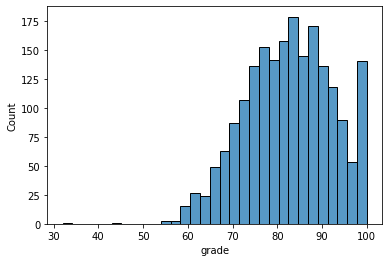

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(x = df['grade'], data= df)

<AxesSubplot:xlabel='grade', ylabel='Count'>

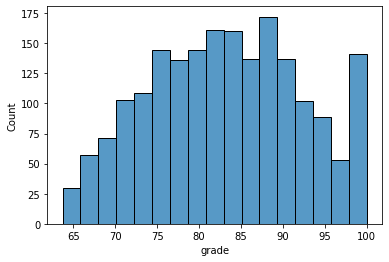

In [10]:
sns.histplot(x = copydf['grade'], data = copydf)


<AxesSubplot:xlabel='grade', ylabel='Count'>

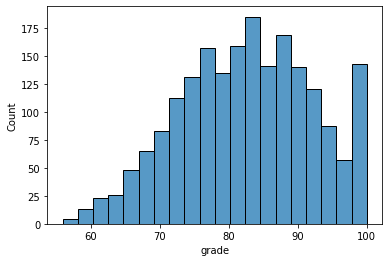

In [11]:
sns.histplot(x = copydf_q['grade'], data = copydf_q)

## **Datos faltantes en DataFrames de Pandas**

Una de las cosas que más incomoda al trabajar con grandes volumenes de datos es encontrar el dato que falta. Puede hacer que sea imposible o impredecible de calcular la mayoría de las estadísticas agregadas o generar tablas dinámicas.

Pandas posee funciones que ayudan a hallar, borrar y cambiar los datos faltantes.

In [43]:
df1 = pd.read_csv('local/data/gradedatamissing.csv')
df1.head()

fname     lname  gender   age  exercise  hours  grade  \
0   Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1   Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2     Nash    Powell    male  18.0       5.0    9.0   79.3   
3  Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4  Noelani    Cherry  female  18.0       4.0   15.0   87.4   

                                    address  
0   9253 Richardson Road, Matawan, NJ 07747  
1          33 Spring Dr., Taunton, MA 02780  
2          41 Hill Avenue, Mentor, OH 44060  
3        8839 Marshall St., Miami, FL 33125  
4  8304 Charles Rd., Lewis Center, OH 43035

In [44]:
df1.shape

(2002, 8)

Primero determinamos si exisen datos NAN en el DataFrame

In [45]:
df1.isna().sum().sum()

27

Para eliminar todas las columnas con datos faltantes (NaN), usamos las siguiente función

In [46]:
df1_no_missing = df1.dropna()
df1_no_missing

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  
0         9253 Richardson Road, Matawan, NJ 07747  
1                33 Spring Dr., Taunton, MA 02780  
2                41 Hill Avenue, Mentor, OH 44060  
3              8839 Marshall St., Miami, FL 33125  
4        8304 Charles Rd., Lewis Center, OH 43035  
...                                           ...  
1997        982 West Street, Alexandria, VA 22304  
1998   78 Morris Street, East Northport, NY 11731  
1999        30 Glenridge Rd., Bountiful, UT 84010  
2000  342 West Meadowbrook Lane, Helena, MT 59601  
2001       81 Homestead Drive, Voorhees, NJ 08043  

[1984 rows x 8 columns]

In [47]:
df1_no_missing.shape

(1984, 8)

Agregar una nueva columna con valores nulos


In [48]:
import numpy as np 
df1['newcol'] = np.nan
df1

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  newcol  
0         9253 Richardson Road, Matawan, NJ 07747     NaN  
1                33 Spring Dr., Taunton, MA 02780     NaN  
2                41 Hill Avenue, Mentor, OH 44060     NaN  
3              8839 Marshall St., Miami, FL 33125     NaN  
4        8304 Charles Rd., Lewis Center, OH 43035     NaN  
...                                           ...     ...  
1997        982 West Street, Alexandria, VA 22304     NaN  
1998   78 Morris Street, East Northport, NY 11731     NaN  
1999        30 Glenridge Rd., Bountiful, UT 84010     NaN  
2000  342 West Meadowbrook Lane, Helena, MT 59601     NaN  
2001       81 Homestead Drive, Voorhees, NJ 08043     NaN  

[2002 rows x 9 columns]

In [49]:
df1.dropna(axis= 1, how= 'all')

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  
0         9253 Richardson Road, Matawan, NJ 07747  
1                33 Spring Dr., Taunton, MA 02780  
2                41 Hill Avenue, Mentor, OH 44060  
3              8839 Marshall St., Miami, FL 33125  
4        8304 Charles Rd., Lewis Center, OH 43035  
...                                           ...  
1997        982 West Street, Alexandria, VA 22304  
1998   78 Morris Street, East Northport, NY 11731  
1999        30 Glenridge Rd., Bountiful, UT 84010  
2000  342 West Meadowbrook Lane, Helena, MT 59601  
2001       81 Homestead Drive, Voorhees, NJ 08043  

[2002 rows x 8 columns]

In [50]:
df1.fillna(0)

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  newcol  
0         9253 Richardson Road, Matawan, NJ 07747     0.0  
1                33 Spring Dr., Taunton, MA 02780     0.0  
2                41 Hill Avenue, Mentor, OH 44060     0.0  
3              8839 Marshall St., Miami, FL 33125     0.0  
4        8304 Charles Rd., Lewis Center, OH 43035     0.0  
...                                           ...     ...  
1997        982 West Street, Alexandria, VA 22304     0.0  
1998   78 Morris Street, East Northport, NY 11731     0.0  
1999        30 Glenridge Rd., Bountiful, UT 84010     0.0  
2000  342 West Meadowbrook Lane, Helena, MT 59601     0.0  
2001       81 Homestead Drive, Voorhees, NJ 08043     0.0  

[2002 rows x 9 columns]

In [52]:
df1['grade'].fillna(df1['grade'].mean(), inplace=True)
df1

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  newcol  
0         9253 Richardson Road, Matawan, NJ 07747     NaN  
1                33 Spring Dr., Taunton, MA 02780     NaN  
2                41 Hill Avenue, Mentor, OH 44060     NaN  
3              8839 Marshall St., Miami, FL 33125     NaN  
4        8304 Charles Rd., Lewis Center, OH 43035     NaN  
...                                           ...     ...  
1997        982 West Street, Alexandria, VA 22304     NaN  
1998   78 Morris Street, East Northport, NY 11731     NaN  
1999        30 Glenridge Rd., Bountiful, UT 84010     NaN  
2000  342 West Meadowbrook Lane, Helena, MT 59601     NaN  
2001       81 Homestead Drive, Voorhees, NJ 08043     NaN  

[2002 rows x 9 columns]

In [55]:
df1['grade'].fillna(df1.groupby('gender')['grade'].transform('mean'), inplace= True)
df1.head()

fname     lname  gender   age  exercise  hours  grade  \
0   Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1   Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2     Nash    Powell    male  18.0       5.0    9.0   79.3   
3  Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4  Noelani    Cherry  female  18.0       4.0   15.0   87.4   

                                    address  newcol  
0   9253 Richardson Road, Matawan, NJ 07747     NaN  
1          33 Spring Dr., Taunton, MA 02780     NaN  
2          41 Hill Avenue, Mentor, OH 44060     NaN  
3        8839 Marshall St., Miami, FL 33125     NaN  
4  8304 Charles Rd., Lewis Center, OH 43035     NaN

In [57]:
df1[df1['age'].notnull() & df1['gender'].notnull()]

fname     lname  gender   age  exercise  hours  grade  \
0        Marcia      Pugh  female  17.0       3.0   10.0   82.4   
1        Kadeem  Morrison    male  18.0       4.0    4.0   78.2   
2          Nash    Powell    male  18.0       5.0    9.0   79.3   
3       Noelani    Wagner  female  14.0       2.0    7.0   83.2   
4       Noelani    Cherry  female  18.0       4.0   15.0   87.4   
...         ...       ...     ...   ...       ...    ...    ...   
1997       Cody  Shepherd    male  19.0       1.0    8.0   80.1   
1998  Geraldine  Peterson  female  16.0       4.0   18.0  100.0   
1999   Mercedes      Leon  female  18.0       3.0   14.0   84.9   
2000     Lucius   Rowland    male  16.0       1.0    7.0   69.1   
2001      Linus    Morris    male  19.0       4.0   10.0   79.6   

                                          address  newcol  
0         9253 Richardson Road, Matawan, NJ 07747     NaN  
1                33 Spring Dr., Taunton, MA 02780     NaN  
2                41 Hill Avenue, Mentor, OH 44060     NaN  
3              8839 Marshall St., Miami, FL 33125     NaN  
4        8304 Charles Rd., Lewis Center, OH 43035     NaN  
...                                           ...     ...  
1997        982 West Street, Alexandria, VA 22304     NaN  
1998   78 Morris Street, East Northport, NY 11731     NaN  
1999        30 Glenridge Rd., Bountiful, UT 84010     NaN  
2000  342 West Meadowbrook Lane, Helena, MT 59601     NaN  
2001       81 Homestead Drive, Voorhees, NJ 08043     NaN  

[1993 rows x 9 columns]